In [30]:
import tensorflow as tf
import os

In [31]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [32]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [33]:
import cv2
import imghdr

In [34]:
data_dir = 'data' 

In [35]:
os.listdir(data_dir)

['angry', 'happy']

In [36]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [37]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path)) 

In [38]:
import numpy as np
from matplotlib import pyplot as plt

In [39]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 149 files belonging to 2 classes.


In [40]:
data_iterator = data.as_numpy_iterator()

In [41]:
batch = data_iterator.next()

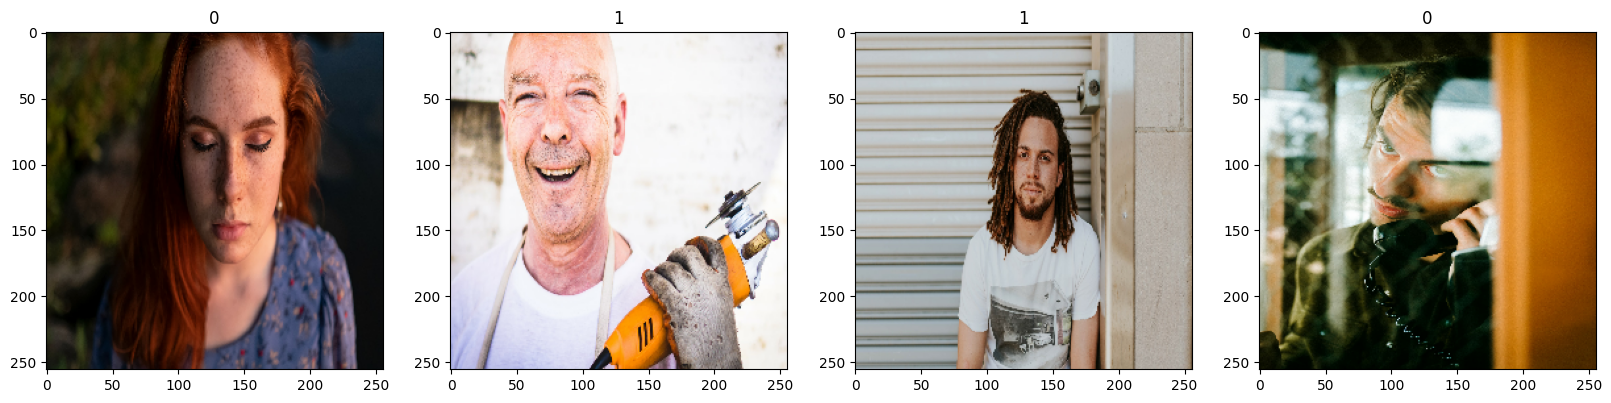

In [42]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [43]:
data = data.map(lambda x,y: (x/255, y))

In [44]:

data.as_numpy_iterator().next()

(array([[[[0.09019608, 0.13333334, 0.06666667],
          [0.08942704, 0.13648586, 0.05805449],
          [0.10563725, 0.14093137, 0.06642157],
          ...,
          [0.10997745, 0.19625196, 0.25115392],
          [0.10633425, 0.19260876, 0.24751072],
          [0.09901602, 0.18529053, 0.24019249]],
 
         [[0.09632664, 0.13162076, 0.06251843],
          [0.09303601, 0.12833013, 0.05138466],
          [0.10470258, 0.13877887, 0.0618334 ],
          ...,
          [0.10447424, 0.19074875, 0.24565071],
          [0.09497549, 0.18125   , 0.23615196],
          [0.09324592, 0.17952043, 0.23442239]],
 
         [[0.09252451, 0.12781863, 0.05330882],
          [0.11035563, 0.14564975, 0.06329681],
          [0.11587775, 0.14725031, 0.05705423],
          ...,
          [0.08841576, 0.17469028, 0.22959223],
          [0.09411765, 0.1764706 , 0.24313726],
          [0.08655024, 0.16890319, 0.23556985]],
 
         ...,
 
         [[0.07437193, 0.08613664, 0.05868566],
          [0.07045

In [45]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)


In [46]:
train_size

3

In [47]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [48]:

train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [50]:
model = Sequential()

In [51]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [52]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

In [54]:
logdir='logs'

In [55]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [56]:
hist = model.fit(train, epochs=40, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/40
3/3 [==============================] - 3s 667ms/step - loss: 2.6627 - accuracy: 0.4896 - val_loss: 2.2226 - val_accuracy: 0.5625
Epoch 2/40
3/3 [==============================] - 2s 624ms/step - loss: 2.3216 - accuracy: 0.4271 - val_loss: 0.7789 - val_accuracy: 0.4688
Epoch 3/40
3/3 [==============================] - 2s 591ms/step - loss: 0.7854 - accuracy: 0.4792 - val_loss: 0.8773 - val_accuracy: 0.5000
Epoch 4/40
3/3 [==============================] - 2s 543ms/step - loss: 0.8034 - accuracy: 0.5625 - val_loss: 0.7694 - val_accuracy: 0.5000
Epoch 5/40
3/3 [==============================] - 2s 565ms/step - loss: 0.7055 - accuracy: 0.5625 - val_loss: 0.6646 - val_accuracy: 0.6562
Epoch 6/40
3/3 [==============================] - 2s 614ms/step - loss: 0.6754 - accuracy: 0.7292 - val_loss: 0.6656 - val_accuracy: 0.8438
Epoch 7/40
3/3 [==============================] - 2s 613ms/step - loss: 0.6523 - accuracy: 0.8125 - val_loss: 0.6592 - val_accuracy: 0.5000
Epoch 8/40
3/3 [====

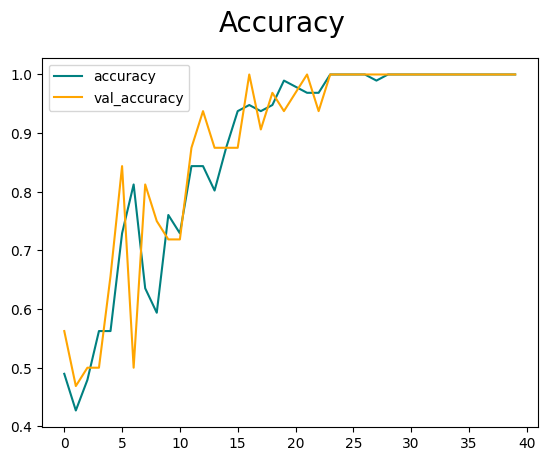

In [57]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [58]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [59]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [60]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [61]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


In [62]:
import cv2


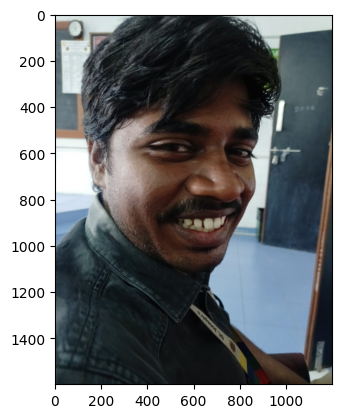

In [63]:
img = cv2.imread('akhappy.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

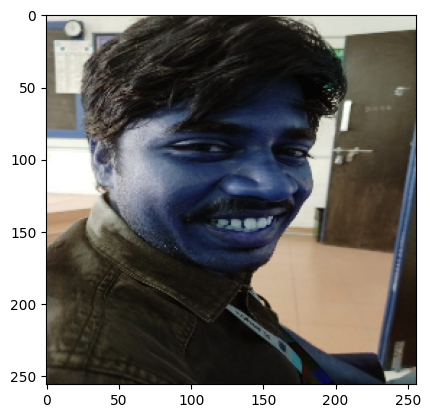

In [66]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [67]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 383ms/step


In [68]:
yhat

array([[8.620624e-06]], dtype=float32)

In [69]:
if yhat > 0.5: 
    print(f'Predicted class is angry')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


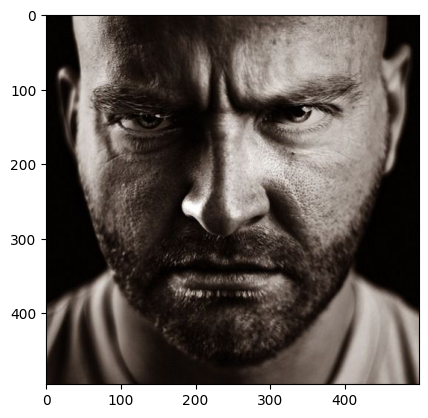

In [70]:
img2 = cv2.imread('grw.jpg')
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))

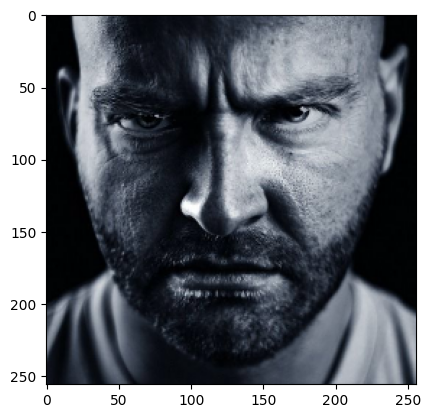

In [71]:
resize = tf.image.resize(img2, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [72]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 16ms/step


In [73]:
yhat

array([[0.6208093]], dtype=float32)

In [74]:
if yhat > 0.5: 
    print(f'Predicted class is angry')
else:
    print(f'Predicted class is Happy')

Predicted class is angry
